In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
df_csv = pd.read_csv (r'ageGroupToMoneyUsage.csv')

In [123]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df_csv.columns:
    print('{} : {}'.format(col,df_csv[col].unique()))

income : [' 2,421,921 ' ' 2,407,332 ' ' 2,105,905 ' ' 2,446,025 ' ' 2,016,589 '
 ' 2,196,920 ' ' 2,013,086 ' ' 2,062,182 ' ' 2,411,211 ' ' 2,237,972 '
 ' 2,019,079 ' ' 2,375,258 ' ' 2,492,775 ' ' 2,487,993 ' ' 2,172,291 '
 ' 2,444,981 ' ' 2,206,497 ' ' 2,051,429 ' ' 2,337,911 ' ' 2,198,495 '
 ' 2,168,550 ' ' 2,018,546 ' ' 2,220,594 ' ' 2,487,406 ' ' 2,325,448 '
 ' 2,511,513 ' ' 2,369,453 ' ' 2,337,356 ' ' 2,481,760 ' ' 2,472,460 '
 ' 2,472,999 ' ' 2,082,947 ' ' 2,127,109 ' ' 2,424,485 ' ' 2,559,312 '
 ' 2,398,528 ' ' 3,709,559 ' ' 3,744,914 ' ' 3,126,059 ' ' 3,560,372 '
 ' 3,422,231 ' ' 3,986,747 ' ' 2,818,067 ' ' 2,737,151 ' ' 3,184,884 '
 ' 2,551,279 ' ' 3,337,874 ' ' 2,581,255 ' ' 3,325,799 ' ' 2,967,568 '
 ' 2,859,593 ' ' 3,100,990 ' ' 3,977,084 ' ' 3,923,827 ' ' 3,765,411 '
 ' 3,418,978 ' ' 3,834,890 ' ' 3,394,106 ' ' 3,248,024 ' ' 2,557,151 '
 ' 3,254,967 ' ' 3,695,462 ' ' 3,901,560 ' ' 3,610,846 ' ' 3,378,590 '
 ' 2,569,486 ' ' 3,463,273 ' ' 3,162,351 ' ' 3,179,008 ' ' 3,532,540

In [124]:
#replace 'commas'
df_csv = df_csv.replace(",","", regex=True)
#change dtype to int32
df_csv = df_csv.astype('int32')
#check if dtype has been changed
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   income     172 non-null    int32
 1   age        172 non-null    int32
 2   card type  172 non-null    int32
 3   usage      172 non-null    int32
dtypes: int32(4)
memory usage: 2.8 KB


In [125]:
#check null
df_csv.isnull().sum()

income       0
age          0
card type    0
usage        0
dtype: int64

<AxesSubplot:>

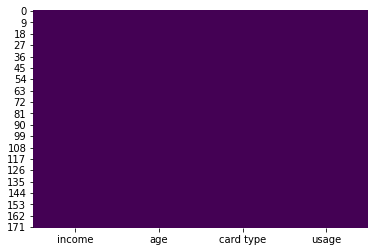

In [126]:
#draw null location in data
sns.heatmap(df_csv.isnull(),cbar=False,cmap='viridis')

In [127]:
#fill in empty or NA rows
num_col = ['income', 'age',  'card type', 'usage']
for col in num_col:
    df_csv[col]=pd.to_numeric(df_csv[col])
    df_csv[col].fillna(df_csv[col].mean(), inplace=True)
df_csv.isnull().sum()

income       0
age          0
card type    0
usage        0
dtype: int64

<AxesSubplot:>

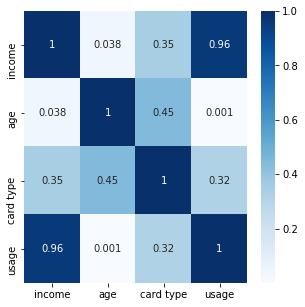

In [128]:
plt.figure(figsize=(5,5))
sns.heatmap(df_csv.corr(),cbar=True,annot=True,cmap='Blues')

<AxesSubplot:xlabel='age', ylabel='Count'>

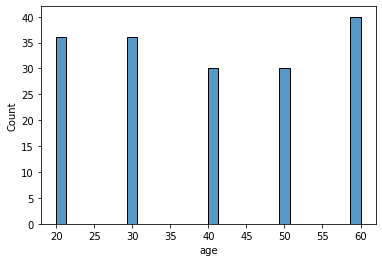

In [129]:
sns.histplot(df_csv.age,bins=30)

Text(0, 0.5, 'usage')

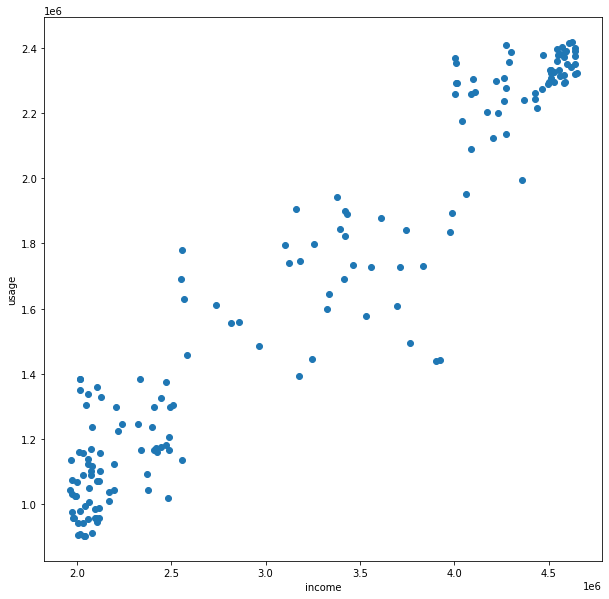

In [130]:
plt.figure(figsize=(10,10))
plt.scatter(x='income',y='usage',data=df_csv)
plt.xlabel('income')
plt.ylabel('usage')

Text(0, 0.5, 'usage')

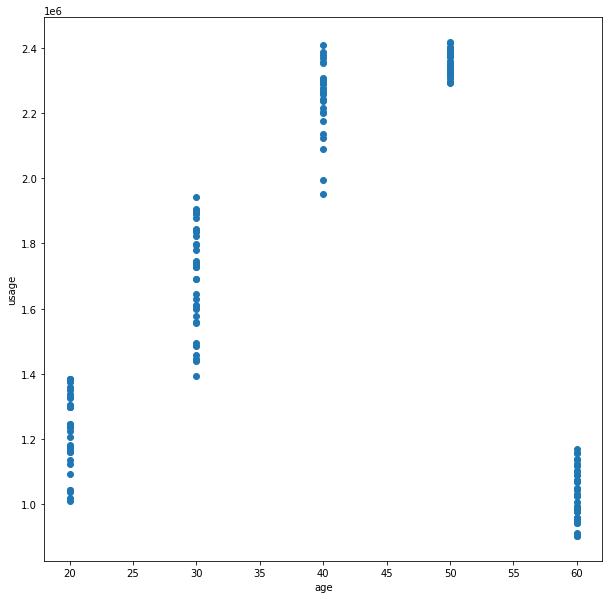

In [131]:
plt.figure(figsize=(10,10))
plt.scatter(x='age',y='usage',data=df_csv)
plt.xlabel('age')
plt.ylabel('usage')

<AxesSubplot:xlabel='age', ylabel='usage'>

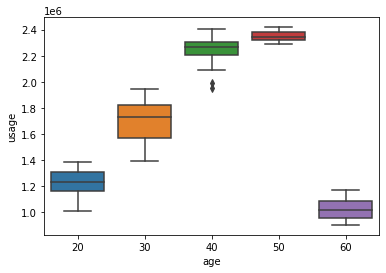

In [132]:
sns.boxplot(x='age',y='usage',data=df_csv)

<AxesSubplot:xlabel='income', ylabel='usage'>

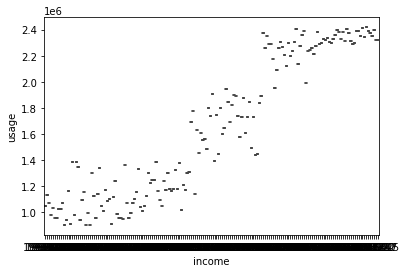

In [133]:
sns.boxplot(x='income',y='usage',data=df_csv)

In [134]:
ageGroup20 = df_csv.loc[(df_csv['age'] == 20),
                    "usage"]
ageGroup30 = df_csv.loc[(df_csv['age'] == 30),
                    "usage"]
ageGroup40 = df_csv.loc[(df_csv['age'] == 40),
                    "usage"]
ageGroup50 = df_csv.loc[(df_csv['age'] == 50),
                    "usage"]
ageGroup60 = df_csv.loc[(df_csv['age'] == 60),
                    "usage"]

Age group 20 mean: 1221800.4722222222

Age group 20 describe:
count    3.600000e+01
mean     1.221800e+06
std      1.128375e+05
min      1.009959e+06
25%      1.160854e+06
50%      1.230862e+06
75%      1.310660e+06
max      1.383399e+06
Name: usage, dtype: float64

Age group 20, 75th quantile: 1310660.0

Age group 20 histogram:


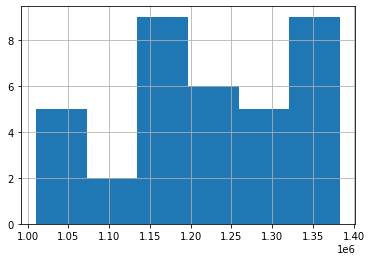

In [135]:
a20m = ageGroup20.mean()
print("Age group 20 mean:",a20m)

print("\nAge group 20 describe:")
print(ageGroup20.describe())

quantile75 = ageGroup20.quantile(0.75)
print("\nAge group 20, 75th quantile:",quantile75)

print("\nAge group 20 histogram:")
hist = ageGroup20.hist(bins=6)



In [136]:
from sklearn.cluster import KMeans

In [137]:
X = df_csv[["income", "age", "card type"]].values.astype('int32')
# X = df_csv[["income", "age", "usage"]].values.astype('int32')

In [138]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [139]:
y_kmeans = kmeans.predict(X)

In [140]:
y_kmeans

array([0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 2, 4, 2, 2, 2, 4, 0, 0,
       2, 0, 2, 0, 2, 2, 0, 2, 4, 4, 4, 2, 4, 2, 2, 0, 2, 2, 4, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [141]:
df_y = pd.DataFrame(y_kmeans, columns = {"cluster"})

In [142]:
df_y

,cluster
0,0
1,0
2,3
3,0
4,3
...,...
167,3
168,3
169,3
170,3


In [143]:
df_csv["cluster"] = df_y["cluster"]

In [144]:
display(df_csv)

,income,age,card type,usage,cluster
0,2421921,20,3,1173910,0
1,2407332,20,2,1166647,0
2,2105905,20,2,1359753,3
3,2446025,20,2,1325813,0
4,2016589,20,2,1383335,3
...,...,...,...,...,...
167,2064319,60,7,1050971,3
168,1976923,60,2,1030082,3
169,1967711,60,0,1134982,3
170,2078444,60,9,912222,3


In [145]:
#extract each cluster cost
array = {}
for x in range(5):
    temp_cluster_info = df_csv.loc[(df_csv['cluster'] == x),
                    "usage"]
    array[x] = temp_cluster_info.quantile(0.75)

for x in range(5):
    print("cluster, usage: ", [x, array[x]])

cluster, usage:  [0, 1420355.5]
cluster, usage:  [1, 2379316.25]
cluster, usage:  [2, 1837988.5]
cluster, usage:  [3, 1155687.5]
cluster, usage:  [4, 2298775.0]


In [152]:
x = [[2421921, 20, 3]]
cluster_result = kmeans.predict(x)

In [153]:
cluster_result[0]

0

cluster 0 mean: 2210551.08

cluster 0 describe:
count    2.500000e+01
mean     2.210551e+06
std      1.546536e+05
min      1.833581e+06
25%      2.135153e+06
50%      2.258065e+06
75%      2.305335e+06
max      2.408172e+06
Name: usage, dtype: float64

cluster 0, 75th quantile: 2305335.0

cluster 0 histogram:


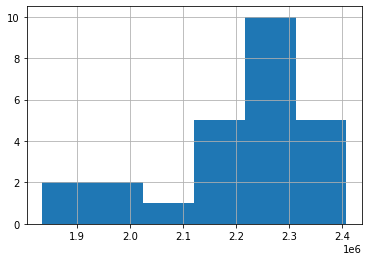

In [110]:
c0m = cluster0.mean()
print("cluster 0 mean:",c0m)

print("\ncluster 0 describe:")
print(cluster0.describe())

quantile75 = cluster0.quantile(0.75)
print("\ncluster 0, 75th quantile:",quantile75)

print("\ncluster 0 histogram:")
hist = cluster0.hist(bins=6)

cluster 1 mean: 1318640.0

cluster 1 describe:
count    2.800000e+01
mean     1.318640e+06
std      2.046770e+05
min      1.017989e+06
25%      1.167133e+06
50%      1.271114e+06
75%      1.464401e+06
max      1.778357e+06
Name: usage, dtype: float64

cluster 1, 75th quantile: 1464401.0

cluster 1 histogram:


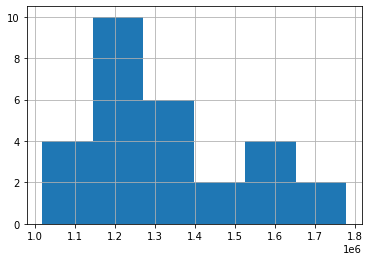

In [111]:
c1m = cluster1.mean()
print("cluster 1 mean:",c1m)

print("\ncluster 1 describe:")
print(cluster1.describe())

quantile75 = cluster1.quantile(0.75)
print("\ncluster 1, 75th quantile:",quantile75)

print("\ncluster 1 histogram:")
hist = cluster1.hist(bins=6)

In [17]:
from sklearn import svm

In [23]:
#classify 목표(target 또는 y) class/레이블 따로 정리
y = df_csv['usage'].values.astype(np.int)

In [24]:
X = df_csv[["income", "age", "card type"]].values.astype('int32')

In [25]:
print(y)
print(X)

[1117197 1282531 1224096 1059599 1178711 1261189 1015987 1298412 1372523
 1287287 1322918 1228586 1306713 1169504 1062700 1052955 1140772 1101403
 1136329 1278865 1299600 1349728 1239816 1168378 1151738 1325184 1062788
 1203936 1281897 1027735 1142029 1190064 1303510 1108082 1111286 1164704
 1775425 1789006 1540323 1849319 1543289 1740331 1483248 1663035 1586415
 1933032 1525433 1847372 1596100 1948187 1462307 1560144 1785485 1872127
 1457493 1439553 1615703 1548909 1911490 1456834 1626820 1880089 1866202
 1540980 1500746 1648320 1510470 1887866 1863732 1630875 1426400 1653923
 2124231 2169765 2416381 2307989 2090826 2243118 2376214 1993989 1981610
 1993906 2130280 2402263 2281682 2124931 2331565 2322903 2086486 2047174
 2304932 2400952 2203705 2369854 2181220 2009759 2217246 2278006 2061667
 2170096 2133263 2255521 2374486 2295352 2312626 2331015 2368770 2412726
 2364279 2395458 2350057 2309347 2332589 2377599 2332087 2314461 2343380
 2380851 2336986 2386756 2342839 2385755 2316234 23

In [27]:
regr=svm.SVR()

In [28]:
regr.fit(X,y)

SVR()

In [29]:
regr.predict([[2367898, 25, 3]])

array([1540605.64315091])